##### Projeto de agrupamento de clientes - perfil de compras
##### Datasets da OLIST 2016-2018 (marketplace): https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

## 1) Entender o negócio, analisando os datasets olist

## 2) Análise Exploratória de Dados

In [3]:
import pandas as pd
import numpy as np

df_orders = pd.read_csv('datasets/olist/olist_orders_dataset.csv')
df_order_items = pd.read_csv('datasets/olist/olist_order_items_dataset.csv')
df_customers = pd.read_csv('datasets/olist/olist_customers_dataset.csv')

### Verificação de dados nulos, tipagem de dados, dados duplicados, distribuição dos dados

In [7]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
df_orders[df_orders['order_approved_at'].isnull()].order_status.value_counts()

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

In [13]:
df_orders[df_orders['order_delivered_carrier_date'].isnull()].order_status.value_counts()

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

In [14]:
df_orders[df_orders['order_delivered_customer_date'].isnull()].order_status.value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Campos de data poderiam ser convertidos de object para datetime...

In [16]:
df_orders.duplicated().value_counts() # sem valores duplicados

False    99441
Name: count, dtype: int64

### Checagem de classes no df_orders e distribuição do status dos pedidos

In [17]:
df_orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [18]:
df_customers.info() # os tipos fazem sentido

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [19]:
df_customers.duplicated().value_counts()

False    99441
Name: count, dtype: int64

In [20]:
# Quantos compraram na base (pegar o unique() do customer_unique_id)
df_customers['customer_unique_id'].unique().shape

# A diferença 99441 - 96096 são clientes que fizeram pedidos mais de uma vez

(96096,)

In [21]:
df_customers['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

In [22]:
# Base de items de pedido - cada pedido pode ter mais de um item
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [23]:
df_order_items.duplicated().value_counts()

False    112650
Name: count, dtype: int64

In [24]:
df_order_items['order_item_id'].describe()

count    112650.000000
mean          1.197834
std           0.705124
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64

In [25]:
df_order_items['price'].describe() # pode ter outliers

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [27]:
df_order_items['freight_value'].describe() # pode ter outliers

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

## 3) Processamento dos dados (junção de tabelas, filtro de features, construção de features (faturamento total por cliente, quantidade total de pedidos por cliente))

In [4]:
df_customers_orders = df_customers.merge(df_orders, how='inner', on='customer_id') # intersecção - comum nas duas tabelas

In [5]:
df_customers_orders_items = df_customers_orders.merge(df_order_items, how='inner', on='order_id')

### Filtrando variáveis

In [34]:
df_customers_orders_items.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [6]:
# Vamos usar customer_unique_id, order_id, price, freight_value, order_status

df_customers_orders_items.drop(columns=[
    i for i in df_customers_orders_items.columns if i not in ['customer_unique_id','order_id','order_status', 'price','freight_value']
], inplace=True)



In [7]:
df_customers_orders_items

,customer_unique_id,order_id,order_status,price,freight_value
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,124.99,21.88
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,289.00,46.48
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,139.94,17.79
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,149.94,23.36
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,230.00,22.25
...,...,...,...,...,...
112645,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,delivered,74.90,13.88
112646,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,114.90,14.16
112647,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,delivered,37.00,19.04
112648,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,delivered,689.00,22.07


In [8]:
df_customers_orders_items = df_customers_orders_items[(df_customers_orders_items.order_status != 'unavailable') & (df_customers_orders_items.order_status != 'canceled')]

In [44]:
df_customers_orders_items.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'approved'],
      dtype=object)

### Feature engineering 

In [9]:
values_by_customer = df_customers_orders_items.groupby(by='customer_unique_id').sum() # apenas numericas

In [10]:
values_by_customer['total_value'] = values_by_customer['price'] + values_by_customer['freight_value']

In [49]:
values_by_customer.describe()

,price,freight_value,total_value
count,94983.000000,94983.000000,94983.000000
mean,142.071747,23.595025,165.666772
std,216.074999,22.867488,226.726478
min,0.850000,0.000000,9.590000
25%,47.900000,14.090000,63.100000
50%,89.890000,17.600000,107.900000
75%,155.000000,25.540000,182.930000
max,13440.000000,1794.960000,13664.080000


In [11]:
df_customers_orders = df_customers_orders[(df_customers_orders.order_status != 'unavailable') &
                                          (df_customers_orders.order_status != 'canceled') &
                                          (df_customers_orders.order_status != 'created')]

In [12]:
quant_orders_by_customer = df_customers_orders.groupby(by='customer_unique_id').count()['order_id']
quant_orders_by_customer = quant_orders_by_customer.reset_index(level=0)

In [13]:
values_by_customer = values_by_customer.reset_index(level=0)

In [54]:
values_by_customer

,customer_unique_id,order_id,order_status,price,freight_value,total_value
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,delivered,129.90,12.00,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,delivered,18.90,8.29,27.19
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,delivered,69.00,17.22,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,delivered,25.99,17.63,43.62
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,delivered,180.00,16.89,196.89
...,...,...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e725cf8e9c24e67...,delivereddelivered,1570.00,497.42,2067.42
94979,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,delivered,64.89,19.69,84.58
94980,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,89.90,22.56,112.46
94981,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,115.00,18.69,133.69


In [55]:
quant_orders_by_customer

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,1
94982,fffea47cd6d3cc0a88bd621562a9d061,1
94983,ffff371b4d645b6ecea244b27531430a,1
94984,ffff5962728ec6157033ef9805bacc48,1


In [28]:
customers_info = values_by_customer.merge(quant_orders_by_customer, how='inner', on='customer_unique_id')

In [29]:
customers_info.drop(columns=['price', 'freight_value', 'order_id_x', 'order_status'], inplace=True)
customers_info.rename(columns={'order_id_y': 'quant_orders'}, inplace=True)

In [16]:
customers_info.columns

Index(['customer_unique_id', 'order_status', 'total_value', 'quant_orders'], dtype='object')

In [30]:
customers_info.to_csv('datasets/olist/customer_info.csv')

### Modelagem

In [31]:
features = customers_info[['total_value','quant_orders']]

In [32]:
features # diferença de escalas -  modelo não entende as regras de negócio (a lógica dos números)

,total_value,quant_orders
0,141.90,1
1,27.19,1
2,86.22,1
3,43.62,1
4,196.89,1
...,...,...
94978,2067.42,1
94979,84.58,1
94980,112.46,1
94981,133.69,1


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [34]:
from sklearn.cluster import KMeans
inertias = []
c_values = range(1,20)
for i in c_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

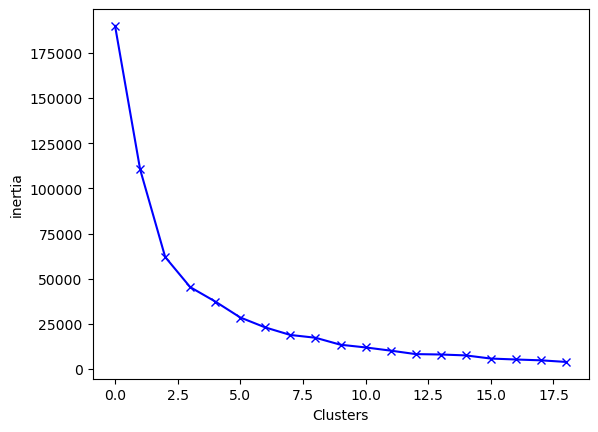

In [35]:
import matplotlib.pyplot as plt
plt.plot(inertias, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('inertia')


In [36]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features_scaled)

KMeans(n_clusters=4)

In [37]:
customers_info['cluster'] = kmeans.labels_
customers_info

,customer_unique_id,total_value,quant_orders,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,0
2,0000f46a3911fa3c0805444483337064,86.22,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1,0
4,0004aac84e0df4da2b147fca70cf8255,196.89,1,0
...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,1,2
94979,fffea47cd6d3cc0a88bd621562a9d061,84.58,1,0
94980,ffff371b4d645b6ecea244b27531430a,112.46,1,0
94981,ffff5962728ec6157033ef9805bacc48,133.69,1,0


In [67]:
customers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94983 entries, 0 to 94982
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  94983 non-null  object 
 1   total_value         94983 non-null  float64
 2   quant_orders        94983 non-null  int64  
 3   cluster             94983 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 2.5+ MB


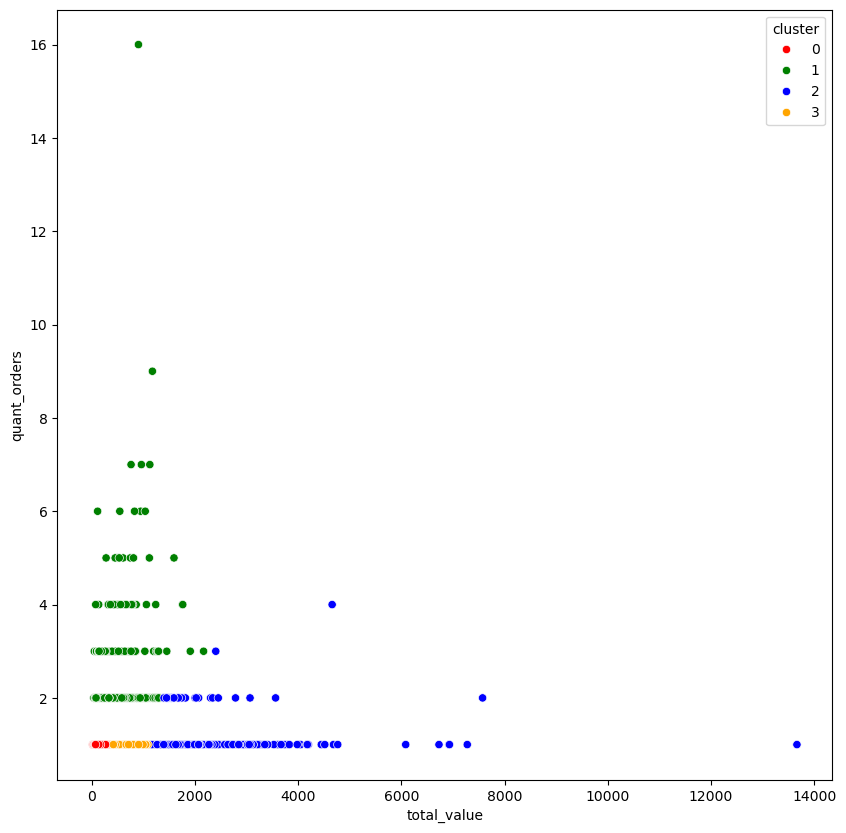

In [38]:
import seaborn as sb
plt.figure(figsize=(10,10))
ax = sb.scatterplot(x='total_value',y='quant_orders',hue='cluster',data=customers_info, palette=['red','green','blue','orange'])


#### Identificamos os grupos que mais gastaram, que mais compraram (vezes), mas precisamos agora obter insights sobre a característica destes grupos, para marketing estratégico

In [39]:
customers_info.to_csv('datasets/olist/costumer_cluster.csv')

## 4) Análise dos clusters. Vamos carregar as bases e integrá-las

In [48]:
df_orders = pd.read_csv('datasets/olist/olist_orders_dataset.csv')
df_order_items = pd.read_csv('datasets/olist/olist_order_items_dataset.csv')
df_customers = pd.read_csv('datasets/olist/olist_customers_dataset.csv')
df_products = pd.read_csv('datasets/olist/olist_products_dataset.csv')
df_reviews = pd.read_csv('datasets/olist/olist_order_reviews_dataset.csv')
df_geolocation = pd.read_csv('datasets/olist/olist_geolocation_dataset.csv')

df_customer_cluster = pd.read_csv('datasets/olist/costumer_cluster.csv')

In [50]:
customers = df_customer_cluster.merge(df_customers, how='inner', on='customer_unique_id')
customers_orders= customers.merge(df_orders, how='inner', on='customer_id')
customer_orders_items = customers_orders.merge(df_order_items, how='inner', on='order_id')
customer_products = customer_orders_items.merge(df_products, how='inner', on='product_id')

#### Vamos analisar as estatísticas do cluster 2

In [51]:
customer_products[customer_products['cluster']==2].describe()

,Unnamed: 0,total_value,quant_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,1463.000000,1463.000000,1463.000000,1463.0,1463.000000,1463.000000,1463.000000,1463.000000,1444.000000,1444.000000,1444.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,47158.443609,1894.352843,1.153110,2.0,43017.355434,2.274094,1013.224969,54.640786,49.355263,1447.929363,2.446676,8054.784542,40.300958,29.403557,30.977428
std,28248.802604,1216.257866,0.494638,0.0,30416.871553,2.585751,823.640727,53.636932,9.150575,1078.368538,1.763748,8729.432271,23.400767,19.775328,15.979544
min,132.000000,1116.690000,1.000000,2.0,1020.000000,1.000000,32.000000,0.070000,14.000000,83.000000,1.000000,50.000000,14.000000,2.000000,11.000000
25%,22514.000000,1316.130000,1.000000,2.0,14640.000000,1.000000,220.000000,24.010000,43.000000,574.250000,1.000000,922.000000,20.000000,15.000000,18.000000
50%,46673.000000,1568.720000,1.000000,2.0,36570.000000,1.000000,1099.000000,37.810000,52.000000,1140.500000,2.000000,3750.000000,34.000000,23.000000,26.000000
75%,72274.000000,2039.200000,1.000000,2.0,74522.500000,2.000000,1437.000000,64.050000,56.000000,1965.250000,4.000000,13437.500000,53.000000,40.000000,40.000000
max,94978.000000,13664.080000,4.000000,2.0,99615.000000,20.000000,6735.000000,409.680000,63.000000,3992.000000,10.000000,30000.000000,105.000000,105.000000,100.000000


#### Pedidos entre R$ 1.117 a R$ 13.664, variando de 1 a 4 pedidos no máximo. Não fazem muitos pedidos. Mas até 75% deste grupo gastaram no máximo R$ 2.039 em um único pedido, com preços unitários (item) variando de R$ 32 a R$ 6735, com 75% até R$ 1437 de preço por item

In [52]:
# categorias de produtos compradas pelo grupo 2
customer_products[customer_products['cluster']==2].product_category_name.value_counts()

product_category_name
informatica_acessorios                            146
pcs                                               136
beleza_saude                                      112
relogios_presentes                                108
automotivo                                        103
moveis_escritorio                                  96
moveis_decoracao                                   77
utilidades_domesticas                              56
esporte_lazer                                      56
ferramentas_jardim                                 51
bebes                                              45
instrumentos_musicais                              44
construcao_ferramentas_construcao                  44
eletroportateis                                    41
telefonia                                          38
cama_mesa_banho                                    35
eletrodomesticos_2                                 29
telefonia_fixa                                     24
cool_s

##### Vamos analisar as reviews deste grupo

In [53]:
customer_reviews = customers_orders.merge(df_reviews, how='inner', on='order_id')

In [55]:
customer_reviews[customer_reviews.cluster == 2].describe()

,Unnamed: 0,total_value,quant_orders,cluster,customer_zip_code_prefix,review_score
count,924.000000,924.000000,924.000000,924.0,924.000000,924.000000
mean,47466.531385,1760.607684,1.082251,2.0,41778.193723,3.943723
std,27770.342953,849.564378,0.328741,0.0,29998.355509,1.508040
min,132.000000,1116.690000,1.000000,2.0,1020.000000,1.000000
25%,23703.000000,1291.390000,1.000000,2.0,14063.500000,3.000000
50%,46820.500000,1503.030000,1.000000,2.0,35438.500000,5.000000
75%,71106.000000,1990.575000,1.000000,2.0,68936.500000,5.000000
max,94978.000000,13664.080000,4.000000,2.0,99615.000000,5.000000


##### 50% satisfeitos (review_score), oferecer produtos, talvez comprem de novo. Já os de score 3 pode-se analisar o texto das reviews, caso tenham escrito. Vamos dar uma olhada no cluster dos que fizeram mais pedidos, 1

In [56]:
customer_reviews[customer_reviews.cluster == 1].describe()

,Unnamed: 0,total_value,quant_orders,cluster,customer_zip_code_prefix,review_score
count,6457.000000,6457.000000,6457.000000,6457.0,6457.000000,6457.00000
mean,47407.813691,301.242797,2.237107,1.0,33949.947963,4.16788
std,27000.121258,238.343655,0.961462,0.0,29779.319421,1.30377
min,106.000000,35.940000,2.000000,1.0,1005.000000,1.00000
25%,24388.000000,147.130000,2.000000,1.0,9750.000000,4.00000
50%,46912.000000,227.240000,2.000000,1.0,22790.000000,5.00000
75%,70457.000000,367.790000,2.000000,1.0,53545.000000,5.00000
max,94937.000000,2164.400000,16.000000,1.0,99750.000000,5.00000


##### Até 25% já indicaram score maior, 4, podendo ser uma hipótese para comprarem mais. Fizeram de 2 a 16 pedidos, sendo que até 75% fizeram 2 pedidos. Analisando o cluster 0, 1 pedido gastando pouco

In [57]:
customer_reviews[customer_reviews.cluster == 0].describe()

,Unnamed: 0,total_value,quant_orders,cluster,customer_zip_code_prefix,review_score
count,82140.000000,82140.000000,82140.0,82140.0,82140.000000,82140.000000
mean,47478.899099,109.726145,1.0,0.0,34793.070599,4.127514
std,27426.087291,64.635960,0.0,0.0,29776.601171,1.306854
min,0.000000,9.590000,1.0,0.0,1003.000000,1.000000
25%,23705.750000,57.977500,1.0,0.0,11055.000000,4.000000
50%,47480.500000,94.740000,1.0,0.0,24220.000000,5.000000
75%,71208.500000,149.320000,1.0,0.0,58032.000000,5.000000
max,94982.000000,301.770000,1.0,0.0,99990.000000,5.000000


In [58]:
customer_products[customer_products['cluster']==0].product_category_name.value_counts()

product_category_name
cama_mesa_banho                  9152
beleza_saude                     7769
esporte_lazer                    7170
moveis_decoracao                 6595
informatica_acessorios           6232
                                 ... 
la_cuisine                          9
fashion_roupa_infanto_juvenil       7
pc_gamer                            5
seguros_e_servicos                  2
pcs                                 1
Name: count, Length: 73, dtype: int64

In [59]:
customer_products[customer_products['cluster']==3].product_category_name.value_counts()

product_category_name
beleza_saude                 1207
relogios_presentes            946
informatica_acessorios        878
moveis_decoracao              851
cama_mesa_banho               806
                             ... 
moveis_colchao_e_estofado       2
tablets_impressao_imagem        2
pc_gamer                        2
livros_importados               1
fashion_esporte                 1
Name: count, Length: 66, dtype: int64

In [60]:
customer_reviews[customer_reviews.cluster == 3].describe()

,Unnamed: 0,total_value,quant_orders,cluster,customer_zip_code_prefix,review_score
count,8612.000000,8612.000000,8612.0,8612.0,8612.000000,8612.000000
mean,47614.909661,494.586035,1.0,3.0,39416.673363,3.965049
std,27421.256790,190.468238,0.0,0.0,29949.696670,1.451515
min,7.000000,301.790000,1.0,3.0,1006.000000,1.000000
25%,24074.750000,348.070000,1.0,3.0,13218.000000,3.000000
50%,47747.000000,419.305000,1.0,3.0,30200.000000,5.000000
75%,71602.750000,599.200000,1.0,3.0,65900.250000,5.000000
max,94977.000000,1115.480000,1.0,3.0,99930.000000,5.000000


##### Clusters 1 e 3 similares em review